# 2-12 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기

[데이터셋 설명](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)  
데이터를 보면 age, sex등등 모든 feature가 우리가 아는 데이터와 형태와는 조금 다른데, 이 데이터가 TOY데이터라 평균을 0, 표준편차를 1로 조정된 모델이다.

In [50]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()



당뇨병 데이터셋의 모양을 보아하니 데이터가 442개이고 특성이 10개임을 확인할 수 있다

In [51]:
print(diabetes.data.shape)

(442, 10)


diabetes의 데이터를 df_x에, target을 df_y에 저장합니다

In [52]:
df_x, df_y = load_diabetes(return_X_y=True)

df_x 값이 numpy array인지 확인합니다

In [53]:
type(df_x)

numpy.ndarray

x 와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,
 random_state=23)

입력 데이터 개수에 맞는 가중치 $\mathbb{W}$ 와 $b$를 준비해주세요.
모델 함수를 구현해주세요

In [55]:
import numpy as np
# 입력 특성이 10개
W = np.random.rand(10)
b = np.random.rand()

In [56]:
def model(X, W, b):
    pred = np.sum(X * W, axis=1) + b
    return pred

손실 함수 `loss` 정의하기

In [57]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    pred = model(X, W, b)
    L = MSE(pred, y)
    return L

In [58]:
def gradient(X, W, b, y):
    N = len(W)

    y_pred = model(X, W, b)

    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

기울기를 구하는 `gradient`함수 구현하기  
하이퍼 파라미터인 학습률 설정하기

In [59]:
LEARNING_RATE = 1e-2
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 20138.5504
Iteration 20 : Loss 15149.8671
Iteration 30 : Loss 11761.5776
Iteration 40 : Loss 9447.0293
Iteration 50 : Loss 7854.2293
Iteration 60 : Loss 6747.7667
Iteration 70 : Loss 5970.0650
Iteration 80 : Loss 5415.5282
Iteration 90 : Loss 5013.2893
Iteration 100 : Loss 4715.6959
Iteration 110 : Loss 4490.6246
Iteration 120 : Loss 4316.3495
Iteration 130 : Loss 4178.1144
Iteration 140 : Loss 4065.8426
Iteration 150 : Loss 3972.6061
Iteration 160 : Loss 3893.6003
Iteration 170 : Loss 3825.4586
Iteration 180 : Loss 3765.7919
Iteration 190 : Loss 3712.8795
Iteration 200 : Loss 3665.4609
Iteration 210 : Loss 3622.5956
Iteration 220 : Loss 3583.5678
Iteration 230 : Loss 3547.8212
Iteration 240 : Loss 3514.9152
Iteration 250 : Loss 3484.4936
Iteration 260 : Loss 3456.2639
Iteration 270 : Loss 3429.9818
Iteration 280 : Loss 3405.4407
Iteration 290 : Loss 3382.4636
Iteration 300 : Loss 3360.8980
Iteration 310 : Loss 3340.6108
Iteration 320 : Loss 3321.4857
Iteration 330 

learning rate를 수정해 가며 3000 이하의 loss 값을 구하였다. 
여기서 test data의 loss값을 구해보자

In [68]:
losses[-1]

2891.1346881476675

In [61]:

loss(X_test, W, b, y_test)

3167.1654749944887

x축에는 X 데이터의 첫 번째 컬럼인 age가 정규화된 값을, y축에는 정답인 target값과 모델이 예측한 값을 넣어서 비교하였다

<function matplotlib.pyplot.show(close=None, block=None)>

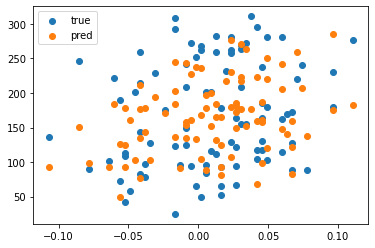

In [62]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], model(X_test, W, b), label='pred')
plt.legend()
plt.show

train 데이터셋도 어떻게 훈련되었는지 확인해 보았다

<function matplotlib.pyplot.show(close=None, block=None)>

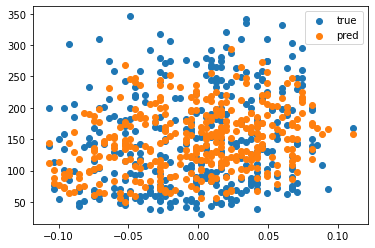

In [63]:
plt.scatter(X_train[:, 0], y_train, label="true")
plt.scatter(X_train[:, 0], model(X_train, W, b), label='pred')
plt.legend()
plt.show

### 회고

+ 당뇨병 수치를 예측하는 이번 플젝은 노드 앞부분과 거의 흡사해서 비교적 손쉽게 진행할 수 있었다. 데이터를 확인하였을 때 모든 데이터가 정규화가 되어있어서 매우 친절한 데이터라고 생각했다. 정규화 여부가 학습에 큰 영향을 미치는 것일지 궁금하다.. 

+ loss값을 3000 이하로 맞춰야 한다고 하길래 긴장했지만 learning rate를 적당히 조절한 것 만으로도 3000 이하의 값을 손쉽게 찾을 수 있었다. 변수인 column들을 골라가며 학습을 해보면 좋겠지만 공부할 내용은 계속 쌓이고 있으니 빨리 넘어가자 ㅎㅎ 아마 이후 노드에서 시도해볼 기회가 있을 것이다.

+ matplotlib로 그린 그래프는 뭔가 마음에 안든다. 다음 익스는 seaborn을 이용해서 예쁘게 그려보자!